In [1]:
!unzip data.zip

Archive:  data.zip
   creating: data/train/
   creating: data/train/class_0/
  inflating: data/train/class_0/class_0_10.jpg  
  inflating: data/train/class_0/class_0_11.jpg  
  inflating: data/train/class_0/class_0_13.jpg  
  inflating: data/train/class_0/class_0_14.jpg  
  inflating: data/train/class_0/class_0_15.jpg  
  inflating: data/train/class_0/class_0_18.jpg  
  inflating: data/train/class_0/class_0_19.jpg  
  inflating: data/train/class_0/class_0_2.jpg  
  inflating: data/train/class_0/class_0_20.jpg  
  inflating: data/train/class_0/class_0_21.jpg  
  inflating: data/train/class_0/class_0_22.jpg  
  inflating: data/train/class_0/class_0_23.jpg  
  inflating: data/train/class_0/class_0_24.jpg  
  inflating: data/train/class_0/class_0_25.jpg  
  inflating: data/train/class_0/class_0_26.jpg  
  inflating: data/train/class_0/class_0_27.jpg  
  inflating: data/train/class_0/class_0_29.jpg  
  inflating: data/train/class_0/class_0_3.jpg  
  inflating: data/train/class_0/class_0_4.j

In [2]:
import tensorflow

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , MaxPooling2D,Dropout,Conv2D
from tensorflow.keras import optimizers

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28
        batch_size=1,
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        'data/val',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28        batch_size=1,
        class_mode='categorical')

Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, (24,24), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])

In [7]:

batch_size = 1
model.fit_generator(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator, 
      validation_steps = validation_generator.samples // batch_size,
      epochs = 80)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
864/864 [==============================] - 15s 16ms/step - loss: 3.5359 - accuracy: 0.0590 - val_loss: 3.4140 - val_accuracy: 0.1574
Epoch 2/80
864/864 [==============================] - 13s 15ms/step - loss: 3.2504 - accuracy: 0.1759
Epoch 3/80
864/864 [==============================] - 13s 15ms/step - loss: 2.7772 - accuracy: 0.2975
Epoch 4/80
864/864 [==============================] - 13s 15ms/step - loss: 2.2388 - accuracy: 0.4236
Epoch 5/80
864/864 [==============================] - 13s 15ms/step - loss: 1.8127 - accuracy: 0.5463
Epoch 6/80
864/864 [==============================] - 12s 14ms/step - loss: 1.5533 - accuracy: 0.5880
Epoch 7/80
864/864 [==============================] - 13s 15ms/step - loss: 1.3697 - accuracy: 0.6238
Epoch 8/80
864/864 [==============================] - 13s 15ms/step - loss: 1.1729 - accuracy: 0.6725
Epoch 9/80
864/864 [==============================] - 13s 15ms/step - loss: 1.0718 - accuracy: 0.6829
Epoch 10/80
864/864 [===================

In [8]:
model.save('letter_class.h5')

In [9]:
import matplotlib.pyplot as plt


In [10]:
acc = model.history.history['accuracy']

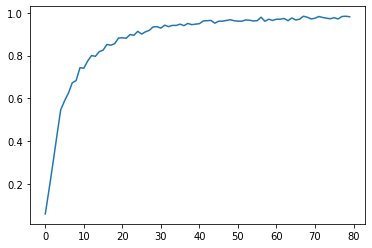

In [11]:
plt.plot(acc)